In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# mouse_drug_data_to_load = ("../Resources/data/mouse_drug_data.csv")
# clinical_trial_data_to_load = ("../Resources/data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data=pd.read_csv("data/clinicaltrial_data.csv")


# Combine the data into a single dataset
combine_data=pd.merge(mouse_drug_data,clinical_trial_data,on="Mouse ID")
# Display the data table for preview

combine_data.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [3]:
Response=combine_data.groupby(["Drug",'Timepoint']).agg({"Tumor Volume (mm3)":"mean"})
#agg({"Tumor Volume(mm3)":"sum"})
Response.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [5]:
Response_sem=combine_data.groupby(["Drug",'Timepoint']).agg({"Tumor Volume (mm3)":"sem"})
Response_sem.head()
Response_sem_t=pd.pivot_table(Response_sem,index=["Timepoint"],columns="Drug")
Response_sem_t.head(20)

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

In [6]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [7]:
#Response_t=np.transpose("Response")
#Response_t
Response_t=pd.pivot_table(Response,index=["Timepoint"],columns="Drug")["Tumor Volume (mm3)"]
Response_t.head(10)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


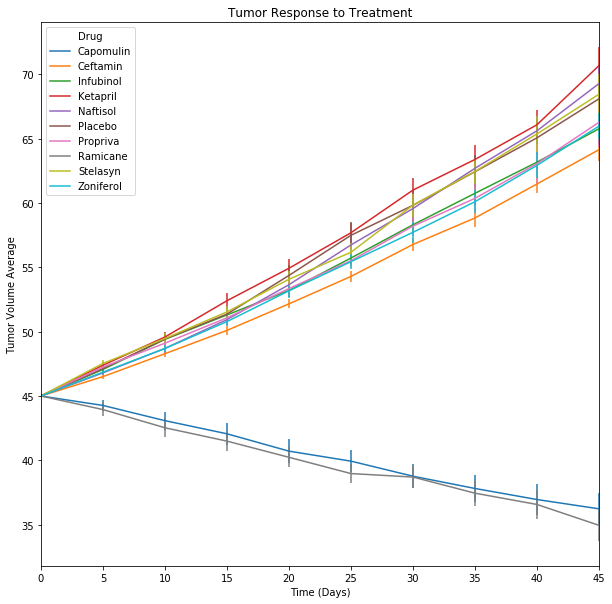

In [8]:
# Generate the Plot (with Error Bars)
#new_file=pd.concat((Response,Response_t),axis=0)
#type(new_file)
#new_file.head()
# plt.plot(Response_t)
# plt.show()
# Save the Figure
y_sem=(Response_sem_t["Tumor Volume (mm3)"])
#print(y_sem)
#print(y_sem)
#plt.figure(figsize=(20,20))
plt.rcParams["figure.figsize"] = [10,10]
#plt.ylabel("Tumor Volume Average")
fig1 = Response_t.plot(yerr=y_sem)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume Average")
plt.xlabel("Time (Days)")
#scatter(x=Response_t.index,y="Campomulin")
#plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("../Images/fig1.png")


In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Response_metastatic=combine_data.groupby(["Drug",'Timepoint']).agg({"Metastatic Sites":"mean"})

# Convert to DataFrame
type(Response_metastatic)
# Preview DataFrame
Response_metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Response_metastatic_sem=combine_data.groupby(["Drug",'Timepoint']).agg({"Metastatic Sites":"sem"})
Response_metastatic_sem.head()
Response_metastatic_sem_t= pd.pivot_table(Response_metastatic_sem,index=["Timepoint"],columns="Drug")
Response_metastatic_sem_t.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [12]:
# Minor Data Munging to Re-Format the Data Frames
Response_metastatic_t=pd.pivot_table(Response_metastatic,index=["Timepoint"],columns="Drug")["Metastatic Sites"]
Response_metastatic_t.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


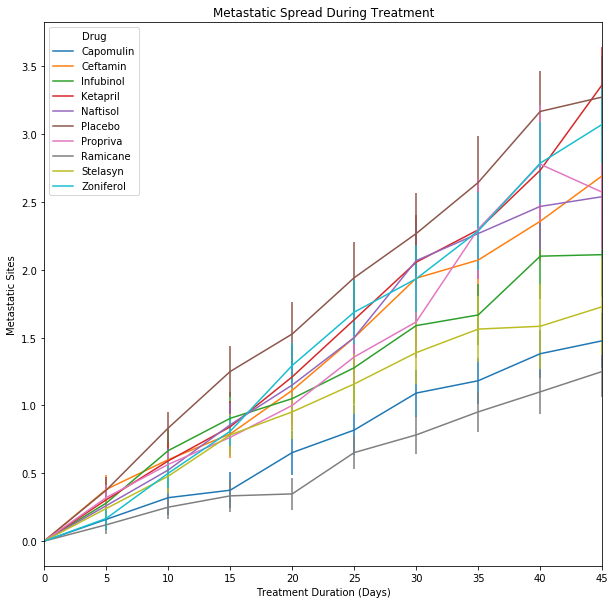

In [13]:
# Generate the Plot (with Error Bars)
y_sem=(Response_metastatic_sem_t["Metastatic Sites"])
fig2 = Response_metastatic_t.plot(yerr=y_sem)
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")

# Save the Figure
plt.savefig("../Images/fig2.png")

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Survival_rates=combine_data.groupby(["Drug","Timepoint"]).agg({"Mouse ID":"nunique"})
# Convert to DataFrame
type(Survival_rates)
# Preview DataFrame
Survival_rates.head()
Survival_rates_t= pd.pivot_table(Survival_rates,index=["Timepoint"],columns="Drug")
Survival_rates_t.head()

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       25   
5                25       21        25       23       23      24       24   
10               25       20        21       22       21      24       22   
15               24       19        21       19       21      20       16   
20               23       18        20       19       20      19       16   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       25        25  
5               25       24        24  
10              24       22        22  
15              24       22        21  
20              23       20        17

In [15]:
# Minor Data Munging to Re-Format the Data Frames
Survival_rates_t=pd.pivot_table(Survival_rates,index=["Timepoint"],columns="Drug")["Mouse ID"]
# Preview the Data Frame
Survival_rates_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 10 columns):
Capomulin    10 non-null int64
Ceftamin     10 non-null int64
Infubinol    10 non-null int64
Ketapril     10 non-null int64
Naftisol     10 non-null int64
Placebo      10 non-null int64
Propriva     10 non-null int64
Ramicane     10 non-null int64
Stelasyn     10 non-null int64
Zoniferol    10 non-null int64
dtypes: int64(10)
memory usage: 880.0 bytes


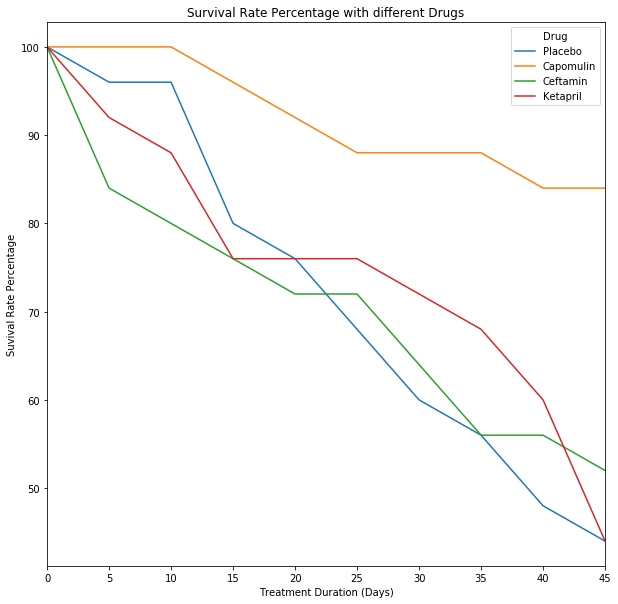

In [16]:
Row1= Survival_rates_t.iloc[0]
#print(type(Row1))
survival_percentage = (Survival_rates_t/Row1)*100
#print(survival_percentage)
# xtest=np.array(Survival_rates_t.index) 
# xtest
#Generate the Plot (Accounting for percentages)
fig3 =survival_percentage.plot(y=["Placebo","Capomulin","Ceftamin","Ketapril"],kind='line')
plt.title("Survival Rate Percentage with different Drugs")
plt.ylabel("Suvival Rate Percentage")
plt.xlabel("Treatment Duration (Days)")


# # Save the Figure

# # Show the Figure
plt.savefig("../Images/fig3.png")
#plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
#this is from "response_t" for the tumor volume change over timepoint
first_row = Response_t.iloc[0]
last_row = Response_t.iloc[-1] 
percent_change =((last_row-first_row)/first_row)*100
#percent_change=pd.DataFrame(percent_change)
print(percent_change)

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


#Written observations:  


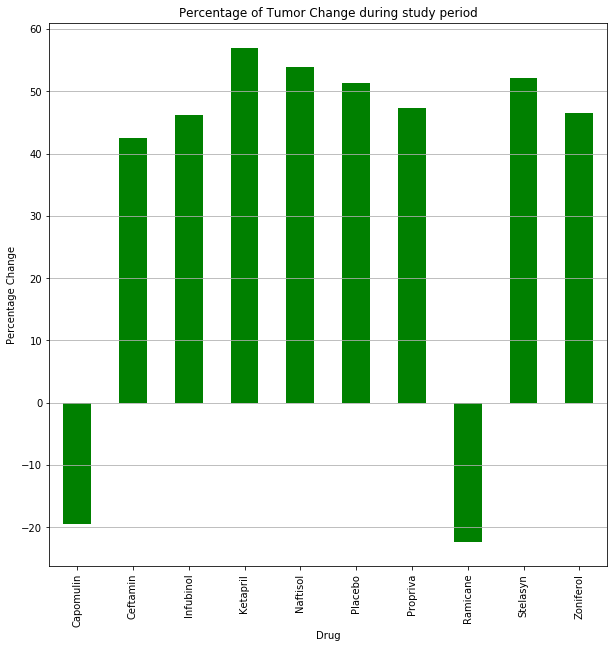

In [61]:
# Store all Relevant Percent Changes into a Tuple
#percent_change_tup=(tuple(x) for x in percent_change.values)
percent_change_tup=tuple(zip(percent_change,percent_change.index))
#percent_change_tup=tuple(percent_change)
#perecent_change_df=pd.DataFrame(percent_change_tup)
type(percent_change_tup)
# print(percent_change_tup)

# Splice the data between passing and failing drugs
Passing_drugs= ()
Failing_drugs= ()
# for i in percent_change:
#     if i>0:
#         print("pass",percent_change)
# #         Passing_drugs = Passing_drugs(i)
# #         appennd(Passing_drugs(i))
#     else:
#         print("fail")
#               Failing_drugs = Failing_drugs.append(Failing_drugs(i))
        #print(i)
for i,j in enumerate(percent_change_tup):
   
#      #print(j)
     if j[0]>0:
        #print("passed")
        Passing_drugs  =  Passing_drugs + percent_change_tup[i]
#         #.append(Passing_drugs)
     else:
        #print("failed")
        Failing_drugs =  Failing_drugs + percent_change_tup[i]
#         #.append(Failing_drugs)

Passing_drugs=[('Capomulin',-19.475303),('Ramicane',-22.320900)]
Failing_drugs = [('Ceftamin',42.516492),
('Infubinol',46.123472),
('Ketapril',57.028795),
('Naftisol',53.923347),
('Placebo',51.297960),
('Propriva',47.241175),
('Stelasyn',52.085134),
('Zoniferol',46.579751)]


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig4 = percent_change.plot.bar(color="green")
#fig4, ax = plt.subplots(sharex=False)
# plt.bar(range(len(Passing_drugs), [val[1] for val in Passing_drugs], align='center')
#plt.bar(range(len(Failing_drugs)),[val[1] for val in Failing_drugs], align='center')
plt.title("Percentage of Tumor Change during study period")
plt.xlabel("Drug")
plt.ylabel("Percentage Change")
plt.grid(which='major',axis='y',zorder=0)
fig4
#fig4.show()
plt.savefig("../Images/fig4.png")

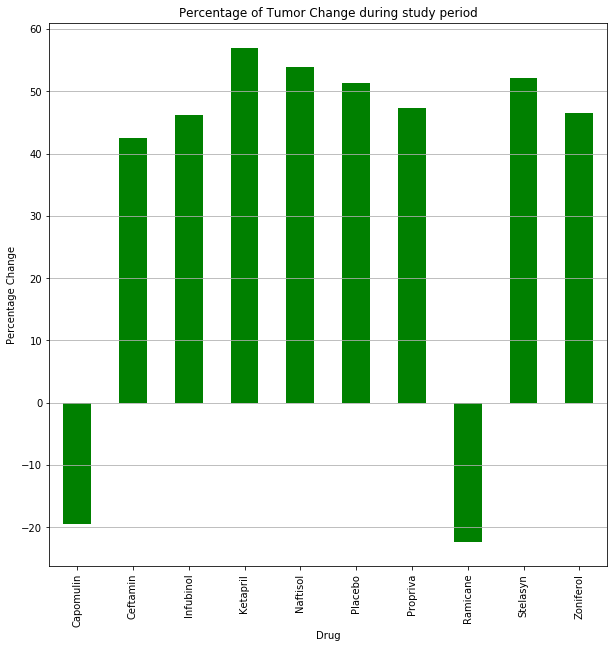

In [61]:
# Store all Relevant Percent Changes into a Tuple
#percent_change_tup=(tuple(x) for x in percent_change.values)
percent_change_tup=tuple(zip(percent_change,percent_change.index))
#percent_change_tup=tuple(percent_change)
#perecent_change_df=pd.DataFrame(percent_change_tup)
type(percent_change_tup)
# print(percent_change_tup)

# Splice the data between passing and failing drugs
Passing_drugs= ()
Failing_drugs= ()
# for i in percent_change:
#     if i>0:
#         print("pass",percent_change)
# #         Passing_drugs = Passing_drugs(i)
# #         appennd(Passing_drugs(i))
#     else:
#         print("fail")
#               Failing_drugs = Failing_drugs.append(Failing_drugs(i))
        #print(i)
for i,j in enumerate(percent_change_tup):
   
#      #print(j)
     if j[0]>0:
        #print("passed")
        Passing_drugs  =  Passing_drugs + percent_change_tup[i]
#         #.append(Passing_drugs)
     else:
        #print("failed")
        Failing_drugs =  Failing_drugs + percent_change_tup[i]
#         #.append(Failing_drugs)

Passing_drugs=[('Capomulin',-19.475303),('Ramicane',-22.320900)]
Failing_drugs = [('Ceftamin',42.516492),
('Infubinol',46.123472),
('Ketapril',57.028795),
('Naftisol',53.923347),
('Placebo',51.297960),
('Propriva',47.241175),
('Stelasyn',52.085134),
('Zoniferol',46.579751)]


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig4 = percent_change.plot.bar(color="green")
#fig4, ax = plt.subplots(sharex=False)
# plt.bar(range(len(Passing_drugs), [val[1] for val in Passing_drugs], align='center')
#plt.bar(range(len(Failing_drugs)),[val[1] for val in Failing_drugs], align='center')
plt.title("Percentage of Tumor Change during study period")
plt.xlabel("Drug")
plt.ylabel("Percentage Change")
plt.grid(which='major',axis='y',zorder=0)
fig4
#fig4.show()
plt.savefig("../Images/fig4.png")

In [ ]:
#Observations:
#  1.)  Capomulin seems to work better than others for tumor response and metastatic spreads
#  2.)  Ramicane is similar to Capomulin in terms of effectiveness 
#  3.)  The Standard Error of data increased over time and more of the two drugs that showed better results.  This could be due to smaller sample size over time.


# I could not iterate over the tuple in the summary bar graph.  I would like to understand the logic better for what I was trying to do.